In [ ]:
# Draft code for making a 1D contrast curve for my Altair data, for R>lambda/D

# Created 2019 Nov. 25 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_file = "data/test_csv_file_all_iterations_20200210_run_02.csv"

In [3]:
# read in csv of detection info
info_file = pd.read_csv(csv_file)

In [7]:
info_file.where(info_file["rad_asec"] == 0.2).dropna()

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
10,10.0,0.001500,0.001,0.0,29344.667514,1.0,5.000000e-04,5.000000e-04,4.462485,0.2,18.691589,4.031408,17.990096
16,16.0,0.002000,0.001,0.0,29344.667514,2.0,5.000000e-04,5.000000e-04,4.740432,0.2,18.691589,4.648245,22.034687
22,22.0,0.002500,0.001,0.0,29344.667514,3.0,5.000000e-04,5.000000e-04,5.046334,0.2,18.691589,5.161974,26.049045
28,28.0,0.002400,0.001,0.0,29344.667514,4.0,-1.000000e-04,1.000000e-04,4.983174,0.2,18.691589,5.066255,25.246030
34,34.0,0.002300,0.001,0.0,29344.667514,5.0,-1.000000e-04,1.000000e-04,4.921121,0.2,18.691589,4.966921,24.442820
40,40.0,0.002350,0.001,0.0,29344.667514,6.0,5.000000e-05,5.000000e-05,4.952024,0.2,18.691589,5.017035,24.844475
46,46.0,0.002340,0.001,0.0,29344.667514,7.0,-1.000000e-05,1.000000e-05,4.945823,0.2,18.691589,5.007083,24.764145
52,52.0,0.002330,0.001,0.0,29344.667514,8.0,-1.000000e-05,1.000000e-05,4.939633,0.2,18.691589,4.997094,24.683812
58,58.0,0.002335,0.001,0.0,29344.667514,9.0,5.000000e-06,5.000000e-06,4.942726,0.2,18.691589,5.002094,24.723981
64,64.0,0.002334,0.001,0.0,29344.667514,10.0,-1.000000e-06,1.000000e-06,4.942106,0.2,18.691589,5.001096,24.715947


In [16]:
# 1. Consider only the rows corresponding to the most recent injection iteration 
#     for each combination of (radius, azimuth, starting amplitude).
# 2. For each radius, find median value of amplitude across all azimuth and 
#     starting amplitude.

# find unique combinations of (radius, azimuth, starting amplitude)
info_file_grouped_rad_ampl_ampl0 = info_file.drop_duplicates(subset=["rad_asec", 
                                                                     "angle_deg", 
                                                                     "ampl_linear_norm_0"])

In [17]:
info_file_grouped_rad_ampl_ampl0

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
0,0,0.001,0.001,0.0,29344.667514,0,NaN,NaN,2.760401,1.1,NaN,9.307034,25.691145
1,1,0.001,0.001,0.0,29344.667514,0,NaN,NaN,2.843545,1.7,NaN,8.778654,24.962497
2,2,0.001,0.001,0.0,29344.667514,0,NaN,NaN,2.517901,0.5,NaN,7.422480,18.689071
3,3,0.001,0.001,0.0,29344.667514,0,NaN,NaN,2.376554,0.8,NaN,9.084806,21.590530
4,4,0.001,0.001,0.0,29344.667514,0,NaN,NaN,4.217543,0.2,NaN,3.299106,13.914121
5,5,0.001,0.001,0.0,29344.667514,0,NaN,NaN,2.444840,1.4,NaN,10.501121,25.673565


In [18]:
# initialize a dataframe for containing the most recent injections

df_recent = pd.DataFrame(columns=list(info_file_grouped_rad_ampl_ampl0.keys()))

In [19]:
for combo_num in range(0,len(info_file_grouped_rad_ampl_ampl0)):
    # loop over each combination of (radius, azimuth, starting amplitude)

    info_file_unique_combo = info_file.where(np.logical_and(np.logical_and(info_file["rad_asec"] == 
                          info_file_grouped_rad_ampl_ampl0["rad_asec"].iloc[combo_num],
                   info_file["angle_deg"] == 
                          info_file_grouped_rad_ampl_ampl0["angle_deg"].iloc[combo_num]),
                   info_file["ampl_linear_norm_0"] == 
                       info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].iloc[combo_num])).dropna(how="all")
    
    for starting_ampl_num in range(0,len(info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].unique())):
        # loop over all starting amplitudes
        
        this_ampl = info_file_grouped_rad_ampl_ampl0["ampl_linear_norm_0"].unique()[starting_ampl_num]
        
        info_file_unique_combo_ampl0 = info_file_unique_combo.where(info_file_unique_combo["ampl_linear_norm_0"] == 
                                                                    this_ampl)
            
        # take the row corresponding to the last injection iteration, for THIS starting amplitude
        info_file_unique_combo_ampl0_recent = info_file_unique_combo_ampl0.where(info_file_unique_combo_ampl0["inject_iteration"] == 
                                                                                 np.nanmax(info_file_unique_combo_ampl0["inject_iteration"])).dropna(how="all")
        
        # paste this row into the 'new' dataframe 
        df_recent = df_recent.append(info_file_unique_combo_ampl0_recent, sort=True)

In [20]:
df_recent

,Unnamed: 0,ampl_linear_norm,ampl_linear_norm_0,angle_deg,host_ampl,inject_iteration,last_ampl_step_signed,last_ampl_step_unsigned,noise,rad_asec,rad_pix,s2n,signal
127,127.0,0.000452,0.001,0.0,29344.667514,24.0,1.000000e-08,1.000000e-08,2.277447,1.1,102.803738,5.000043,11.387333
91,91.0,0.000550,0.001,0.0,29344.667514,15.0,1.000000e-08,1.000000e-08,2.578610,1.7,158.878505,5.000048,12.893174
102,102.0,0.000552,0.001,0.0,29344.667514,17.0,1.000000e-08,1.000000e-08,1.995692,0.5,46.728972,5.000023,9.978507
123,123.0,0.000492,0.001,0.0,29344.667514,22.0,1.000000e-08,1.000000e-08,1.796723,0.8,74.766355,5.000069,8.983740
120,120.0,0.002333,0.001,0.0,29344.667514,21.0,-1.000000e-08,1.000000e-08,4.941426,0.2,18.691589,4.999996,24.707110
128,128.0,0.000403,0.001,0.0,29344.667514,24.0,1.000000e-08,1.000000e-08,1.979033,1.4,130.841121,5.000023,9.895209


In [21]:
# among the rows in the 'new' dataframe, take the median at each radius

contrast_curve = df_recent.groupby(["rad_asec"], axis=0, as_index=False).median()

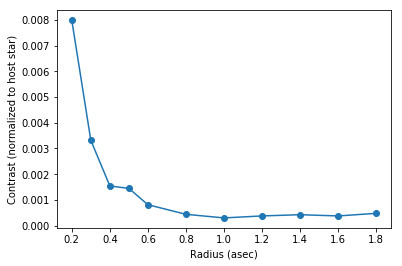

In [24]:
plt.plot(contrast_curve["rad_asec"],contrast_curve["ampl_linear_norm"],marker="o")
plt.xlabel("Radius (asec)")
plt.ylabel("Contrast (normalized to host star)")
plt.savefig("junk.pdf")

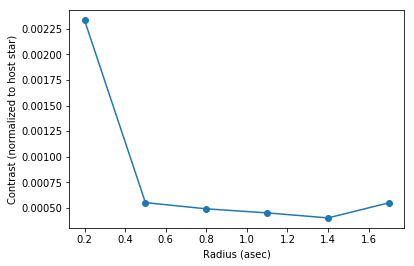

In [23]:
plt.plot(contrast_curve["rad_asec"],contrast_curve["ampl_linear_norm"],marker="o")
plt.xlabel("Radius (asec)")
plt.ylabel("Contrast (normalized to host star)")
plt.savefig("junk.pdf")

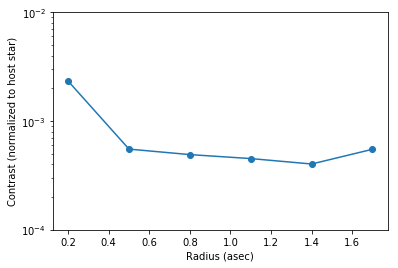

In [24]:
plt.plot(contrast_curve["rad_asec"],contrast_curve["ampl_linear_norm"],marker="o")
plt.xlabel("Radius (asec)")
plt.ylabel("Contrast (normalized to host star)")
plt.yscale('log')
plt.ylim([0.0001,0.01])
plt.savefig("junk.pdf")
#plt.show()

In [23]:
contrast_curve["ampl_linear_norm_0"].values

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001])

In [ ]:
# write out to csv
file_name_cc = config["data_dirs"]["DIR_S2N"] + config["file_names"]["CONTCURV_CSV"]
contrast_curve_pd.to_csv(file_name_cc, sep = ",", columns = ["rad_asec","ampl_linear_norm"])
print("Wrote out contrast curve CSV to " + file_name_cc)

# make plot
print(contrast_curve_pd)
file_name_cc_plot = config["data_dirs"]["DIR_FYI_INFO"] + config["file_names"]["CONTCURV_PLOT"]
plt.plot(contrast_curve_pd["rad_asec"],contrast_curve_pd["ampl_linear_norm"])
plt.xlabel("Radius from host star (asec)")
plt.ylabel("Min. companion amplitude with S/N > threshhold")
plt.savefig(file_name_cc_plot)
plt.clf()
print("Wrote out contast curve plot to " + file_name_cc_plot)